<a href="https://colab.research.google.com/github/gulbudakk/SpotifyDataScience/blob/main/CS210_Spotify_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#1DB954"> Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System - Summary
### <font color='#191414'>**Group Members:**

### <font color= "#ffffff">
* Uğur Sezer Aşıkoğlu
* Melisa Yılmaz
* Kalender Gülbudak
</font> 

  ---

  ## <font color="#1DB954">**Neccessary Library imports and reading original datasets**</font> 

  In starting we import necessary libraries and read our spotify datasets then for data analysis we clear our data and show properties of our data then we point out outliers of all features of our data frames. We visualize relationships between features of the songs, how these features change within different eras, and how the genres change in itself with the time. In more detail, we try to analyze the top 10 popular songs and which kind of differences they have, and which kind of features determine the popularity of songs. Then we ask some questions to our data and try to create connections about them such as How songs’ specific features changed during World War 2, is there any difference between songs' release season, and how Indie, synth, Pop, and Classical music change with time?

  ---

In [ ]:
from google.colab import drive
from os.path import join
import matplotlib.pyplot as plt

drive.mount('./drive')
path_prefix = "./drive/MyDrive/CS210DataSets"

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from scipy import stats
from scipy.stats import f_oneway
from scipy import special
import seaborn as sns
from os.path import join
from os import listdir

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
yearsdf= pd.read_csv(join(path_prefix,"data_by_year.csv")) #Reads the dataframe
data_w_genresdf = pd.read_csv(join(path_prefix, "data_w_genres.csv"))
tracksdf = pd.read_csv(join(path_prefix, "data.csv"))
df_artist = pd.read_csv(join(path_prefix, 'data_by_artist.csv'))

In [ ]:
yearsdf.describe() #Helps to see some ome basic statistical details such as mean,std,min,max etc.

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,1970.500000,0.548818,0.536939,228698.383547,0.455189,0.214148,0.212475,-12.192694,0.116602,116.096664,0.530724,22.949745,3.794118,1.0
std,29.588849,0.271056,0.049568,28440.517398,0.164968,0.109135,0.016892,3.048535,0.107207,5.944764,0.058941,16.780564,3.518940,0.0
min,1920.000000,0.189632,0.415141,140135.140496,0.208856,0.099986,0.162309,-20.840083,0.051205,100.033149,0.378276,0.090909,0.000000,1.0
25%,1945.250000,0.298426,0.501910,211933.800750,0.280230,0.124572,0.200305,-14.298878,0.064468,111.042118,0.492407,3.315919,0.000000,1.0
50%,1970.500000,0.458340,0.541315,238300.393513,0.494563,0.182022,0.212563,-11.849556,0.084892,117.813859,0.541784,29.160167,2.000000,1.0
75%,1995.750000,0.843186,0.573307,249445.435116,0.595108,0.283295,0.222198,-9.756256,0.101711,120.635131,0.570131,36.105230,7.000000,1.0
max,2021.000000,0.962702,0.655929,284759.933638,0.694245,0.581701,0.262480,-7.376558,0.627131,125.203277,0.669676,50.873598,10.000000,1.0


In [ ]:
data_w_genresdf.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000
mean,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818
std,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821
min,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000
50%,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000
75%,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,0.986000,3.367000,0.971000,219.833000,0.997000,94.000000,11.000000,1.000000,3179.000000


In [ ]:
tracksdf.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [ ]:
df_artist.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,32539.000000,32539.000000,3.253900e+04,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000,32539.000000
mean,0.455682,0.552737,2.485982e+05,0.525908,0.233281,0.209035,-11.008171,0.092047,117.433745,0.498812,24.473452,5.459787,0.734903,12.561818
std,0.383678,0.176445,1.581808e+05,0.267402,0.334487,0.151781,5.568630,0.111257,24.467506,0.247154,23.021041,3.473653,0.441392,52.407821
min,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.055155,0.436487,1.804616e+05,0.299000,0.000012,0.109000,-13.792500,0.039700,100.983500,0.305792,0.000000,2.000000,0.000000,2.000000
50%,0.391833,0.563000,2.215070e+05,0.537375,0.009550,0.162000,-9.887000,0.052822,118.779000,0.506000,22.666667,6.000000,1.000000,2.000000
75%,0.876000,0.684500,2.815870e+05,0.747039,0.451149,0.259500,-6.944500,0.090800,130.552000,0.691500,43.141941,8.000000,1.000000,7.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,0.986000,3.367000,0.971000,219.833000,0.997000,94.000000,11.000000,1.000000,3179.000000


In [ ]:
tracksdf.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


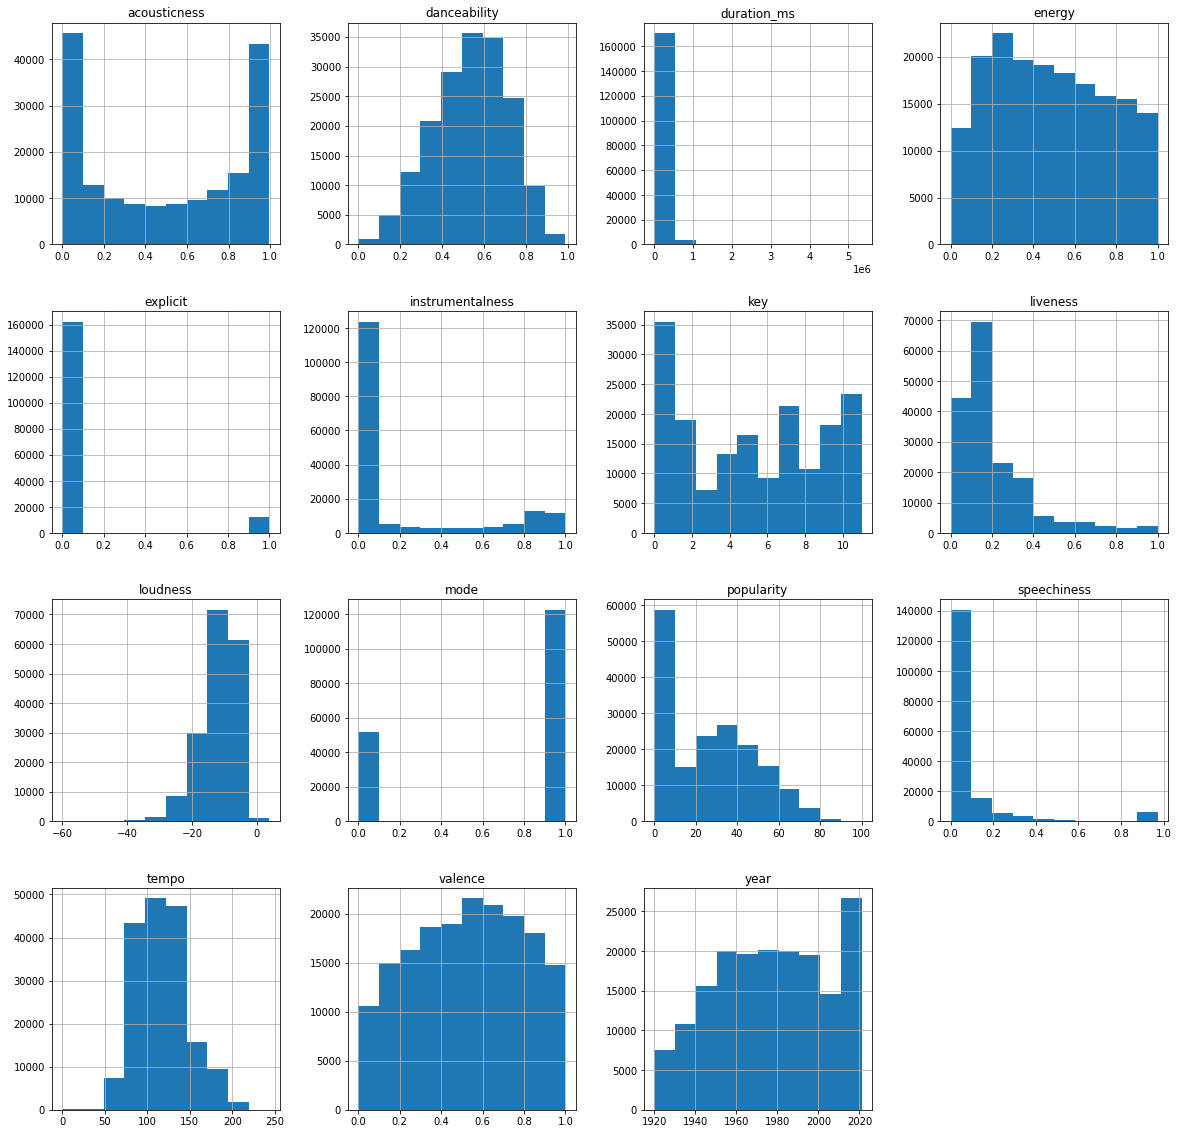

In [ ]:
tracksdf.hist(figsize=(20, 20))
plt.show()

We tried to show the visualization of the whole data to understand the distribution of the features of the data and to clarify which kind of questions could we asked under that distributions.

In [ ]:
tracksdf = tracksdf.loc[tracksdf['release_date'].str.len() != 4] #cleared out the date datas which does not contain ant date and month info but only year
tracksdf.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
8,0.996000,['Francisco Canaro'],0.469,146840,0.238,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.006820,['Meetya'],0.571,476304,0.753,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920


In [ ]:
tracksdf['artists'] = tracksdf['artists'].str.slice(start = 2)
tracksdf['artists'] = tracksdf['artists'].str.slice(stop = -2)
tracksdf = pd.merge(tracksdf, data_w_genresdf, on='artists')
tracksdf.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
0,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.0264,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,0.738125,0.597000,153622.375,0.4725,0.033991,0.267488,-10.309187,0.071781,124.976125,0.699437,19.4375,5,1,32,"['blues', 'traditional blues']"
1,0.583000,Screamin' Jay Hawkins,0.744,144360,0.434,0,1YwoYPfhuZlLDbJUH1cKSi,0.0151,5,0.0715,-10.807,0,I Put a Spell on You,44,1999-10-08,0.0845,173.871,0.9390,1999,0.738125,0.597000,153622.375,0.4725,0.033991,0.267488,-10.309187,0.071781,124.976125,0.699437,19.4375,5,1,32,"['blues', 'traditional blues']"
2,0.639000,Screamin' Jay Hawkins,0.717,145867,0.442,0,7rCchsJktyFH0MB5SIpnbN,0.0233,5,0.1060,-11.594,0,I Put a Spell On You,38,1991-08-13,0.0715,174.060,0.9440,1991,0.738125,0.597000,153622.375,0.4725,0.033991,0.267488,-10.309187,0.071781,124.976125,0.699437,19.4375,5,1,32,"['blues', 'traditional blues']"
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.8010,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,0.000445,0.653333,407315.000,0.8210,0.856667,0.086300,-7.745667,0.048400,128.659667,0.120400,11.0000,2,1,6,['circuit']
4,0.000012,Oscar Velazquez,0.568,386287,0.729,0,0TIfXVGqyiOTuWkuxEzQzc,0.9120,2,0.0613,-8.293,1,True House Music - Original Massive Mix,3,1920-01-01,0.0312,129.987,0.1750,1920,0.000445,0.653333,407315.000,0.8210,0.856667,0.086300,-7.745667,0.048400,128.659667,0.120400,11.0000,2,1,6,['circuit']


For connecting tracks with their genres we apply this merge function.

There exists none nan distribution in our data. There exist no null data in our set. So in total our data is already clean however we adjust release dates of our tracks data because there exist 2 expression type of release date like "1929" and "1920-01-05" we cleared our tracks data from just year type of release date. 

Also its important for our comparison in summer and fall released songs cause we need released date as whole not just year.

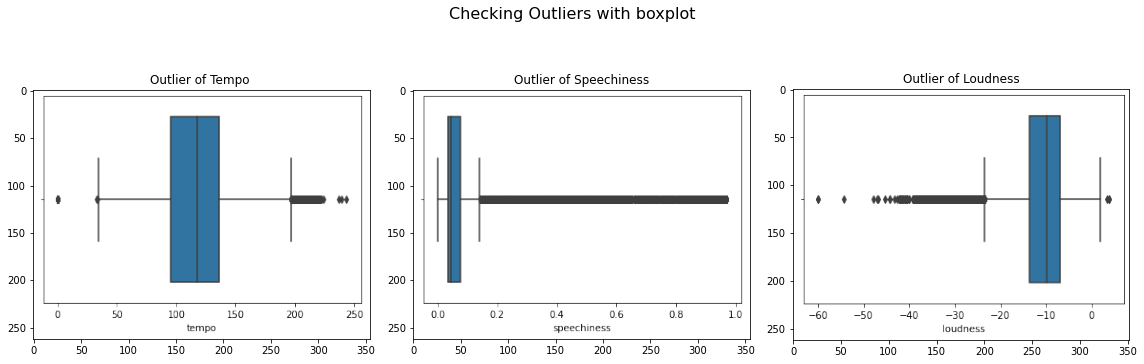

In [ ]:
import matplotlib.pyplot as plt
img1 = plt.imread('./drive/MyDrive/tempo_outlier.png')
img2 = plt.imread('./drive/MyDrive/speechiness_outlier.png')
img3 = plt.imread('./drive/MyDrive/loudness_outliers.png')

NUM_ROWS = 1
IMGs_IN_ROW = 3

f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

ax[0].set_title('Outlier of Tempo ')
ax[1].set_title('Outlier of Speechiness')
ax[2].set_title('Outlier of Loudness')

title = 'Checking Outliers with boxplot'
f.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()

We checked all the outliers in the data, most of the outliers were in the Tempo, Speechiness and Loudnesses of the songs.

  ---

  ## <font color="#1DB954">**Are there any differences between the features of the pop songs which are released in summer and released in fall?**</font> 

  ---

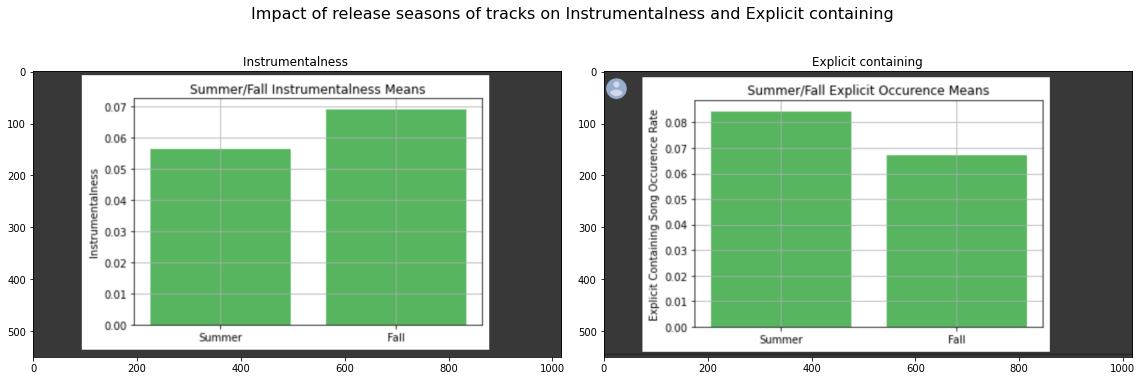

In [ ]:
  import matplotlib.pyplot as plt
  img1 = plt.imread('./drive/MyDrive/season1.png')
  img2 = plt.imread('./drive/MyDrive/season2.png')

  NUM_ROWS = 1
  IMGs_IN_ROW = 2
  f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

  ax[0].imshow(img1)
  ax[1].imshow(img2)

  ax[0].set_title('Instrumentalness ')
  ax[1].set_title('Explicit containing')

  title = 'Impact of release seasons of tracks on Instrumentalness and Explicit containing'
  f.suptitle(title, fontsize=16)
  plt.tight_layout()
  plt.show()

We checked the differences between all features and the only visible difference between the pop songs released in summer and the pop songs released in fall are in their average instrumentalness and average explicit content occurrence. The expected outcome of this comparison would be that the average mood of pop songs released in summer was higher than that are released in fall. 

However, apparently season of the year which these songs were released were not related to the mood, but only related to the instrumentalness and explicit content occurrence.

---

## <font color="9B00FF">**How songs' energy, liveness, and danceability changed during World War 2?**</font> 


---

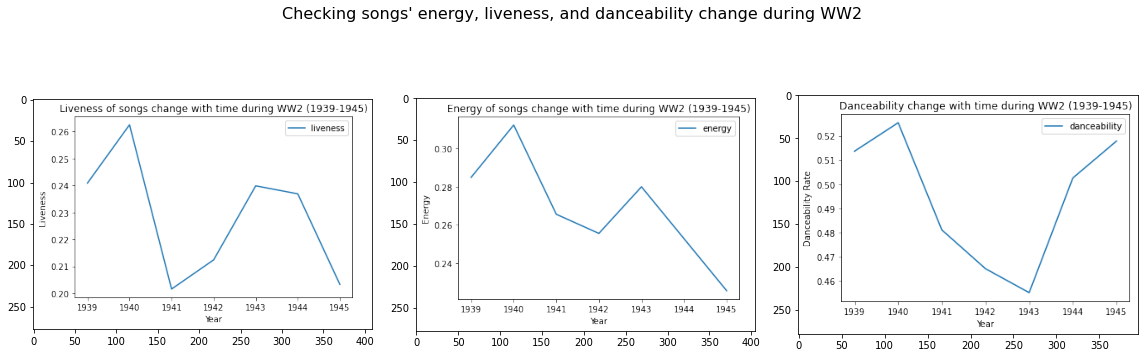

In [ ]:
import matplotlib.pyplot as plt
img1 = plt.imread('./drive/MyDrive/livenessWW2.png')
img2 = plt.imread('./drive/MyDrive/energyWW2.png')
img3 = plt.imread('./drive/MyDrive/danceabilityWW2.png')


NUM_ROWS = 1
IMGs_IN_ROW = 3

f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)


title = "Checking songs' energy, liveness, and danceability change during WW2"
f.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()

If we limit our range between 1940 and 1943 there exists a negative correlation so during intense times of WW2 songs' dance abilities are decreased and this may reflect that happiness decreased during those times.

For energy of the songs duringn WW2 we have a similar condition with danceability but in this example we have gradual transition and if we restrict our scale especially between 1940-1942 there exist huge fall and negative correlation.

For liveness similar to danceability and energy rates, it points out a sharp fall. If we further interpret these data with U.S.A entrance to WW2 there exists a huge fall. Towards the ending rates a bit increases.

###Hypothesis Testing

Hypothesis tests for all three features were failed to be rejected.

In conclusion, there does not exist a correlation between World War 2 and liveness, energy, and danceability of songs.

---

## <font color="orange">**Analysis of the Most Popular Artists and Songs**</font> 


---

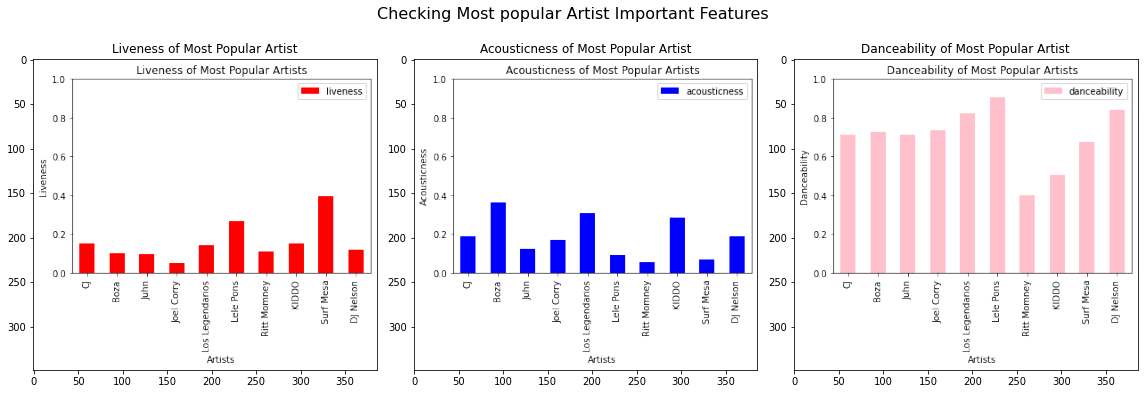

In [ ]:
import matplotlib.pyplot as plt
img1 = plt.imread('./drive/MyDrive/mostliveness.png')
img2 = plt.imread('./drive/MyDrive/mostacousticness.png')
img3 = plt.imread('./drive/MyDrive/mostdanceability.png')


NUM_ROWS = 1
IMGs_IN_ROW = 3

f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)



ax[0].set_title('Liveness of Most Popular Artist')
ax[1].set_title('Acousticness of Most Popular Artist')
ax[2].set_title('Danceability of Most Popular Artist')


title = 'Checking Most popular Artist Important Features'
f.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()

At this part, we try to analysize most popular artists and to answer which kind of features have role to determine popularity of artists and also which kind of differences they have compare to other artists.

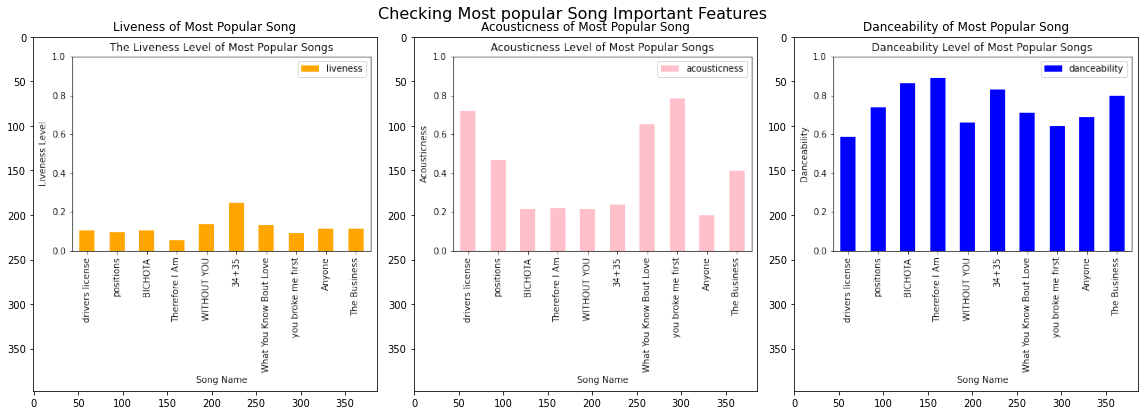

In [ ]:
import matplotlib.pyplot as plt
img1 = plt.imread('./drive/MyDrive/mostsonglive.png')
img2 = plt.imread('./drive/MyDrive/mostsongacousticness.png')
img3 = plt.imread('./drive/MyDrive/mostsongdance.png')


NUM_ROWS = 1
IMGs_IN_ROW = 3

f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)



ax[0].set_title('Liveness of Most Popular Song')
ax[1].set_title('Acousticness of Most Popular Song')
ax[2].set_title('Danceability of Most Popular Song')


title = 'Checking Most popular Song Important Features'
f.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()

We try to analyze top 10 popular songs and show that what the name of the these songs are and which kind of differences they have compare to other songs.

###Hypothesis Testing

#### <font color='#6600cc'>What is the effect of the danceability to the popularity of the songs?

**Hypothesis Test:** We want to test whether there is significant differences in terms of danceability for songs which have different popularity level.



**Null Hypothesis *(H0)*:** Means of danceability for all songs which have different popularity level are same.

$ H_0: \mu_{d Most Popular Songs} = \mu_{d Middle Popular Songs} = \mu_{d Least Popular Songs}$



**Alternative Hypothesis *(HA)*:** Means of danceability for all songs which have different popularity level are not the same.

$ H_A:$ Means $\mu_{d Most Popular Songs}, \mu_{d Middle Popular Songs}, \mu_{d Least Popular Songs}$ are different.

We use the ANOVA test statistic to determine the **p-value** of the danceability of songs of different popularity level because we try to measure three samples simultaneously.

**Significance Level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.


The mean of danceability of most popular 100 songs is: 0.6956000000000002

The mean of danceability of middle popular 100 songs is: 0.51406

The mean of danceability of least popular 100 songs is: 0.4364800000000001

Text(0.5, 1.0, 'Comparison with KDE')

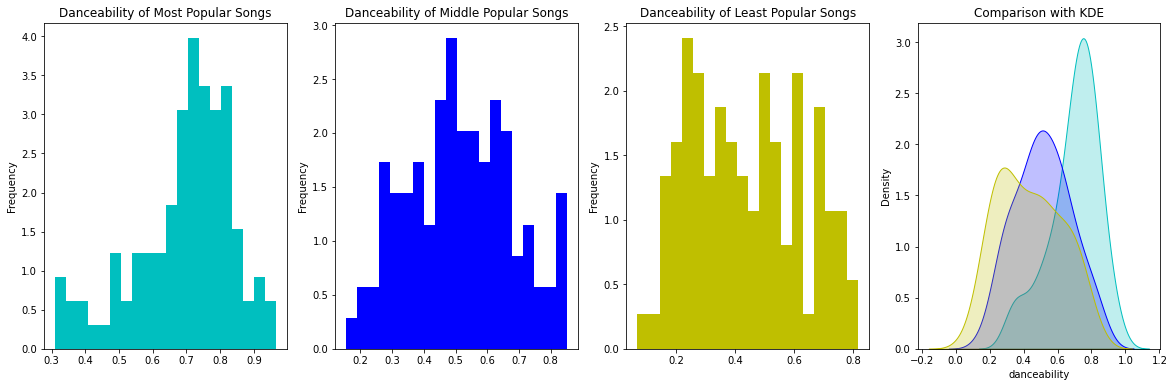

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,6))

popular_song['danceability'].plot(kind="hist", ax=ax[0], bins = 20, label = "danceability", color = "c", density=True)
ax[0].set_title("Danceability of Most Popular Songs")

middle_song['danceability'].plot(kind="hist", ax=ax[1], bins = 20, label = "danceability", color = "b", density=True)
ax[1].set_title("Danceability of Middle Popular Songs")

least_song['danceability'].plot(kind="hist", ax=ax[2], bins = 20, label = "danceability", color = "y", density=True)
ax[2].set_title("Danceability of Least Popular Songs")

sns.kdeplot(popular_song['danceability'], shade=True, label="danceability", ax=ax[3], color="c")
sns.kdeplot(middle_song['danceability'], shade=True, label="danceability", ax=ax[3], color="b")
sns.kdeplot(least_song['danceability'], shade=True, label="danceability", ax=ax[3], color="y")
ax[3].set_title("Comparison with KDE")


From the figure above, we can see that the songs which are more popular have higher danceability level compared to the songs which are middle and least popular. 


p-value of the danceability for songs who have different popularity level: 1.8912026848407807e-23

**Interpreting Results of Danceability:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of danceability of songs which have different popularity level samples are not the same. Here, we reject the null hypothesis.

#### <font color='#6600cc'>What is the effect of the liveness to the popularity of the songs?

**Hypothesis Test:** We want to test whether there is significant differences in terms of liveness for songs which have different popularity level.



**Null Hypothesis *(H0)*:** Means of liveness for all songs which have different popularity level are same.

$ H_0: \mu_{l Most Popular Songs} = \mu_{l Middle Popular Songs} = \mu_{l Least Popular Songs}$



**Alternative Hypothesis *(HA)*:** Means of liveness for all songs which have different popularity level are not the same.


$ H_A:$ Means $\mu_{l Most Popular Songs}, \mu_{l Middle Popular Songs}, \mu_{l LeastPopular Songs}$ are different.

We use the ANOVA test statistic to determine the **p-value** of the liveness of songs of different popularity level because we try to measure three samples simultaneously.


**Significance Level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

The mean of liveness of most popular 100 songs is: 0.161967

The mean of liveness of middle popular 100 songs is: 0.21250099999999997

The mean of liveness of least popular 100 songs is: 0.2566660000000001

Text(0.5, 1.0, 'Comparison with KDE')

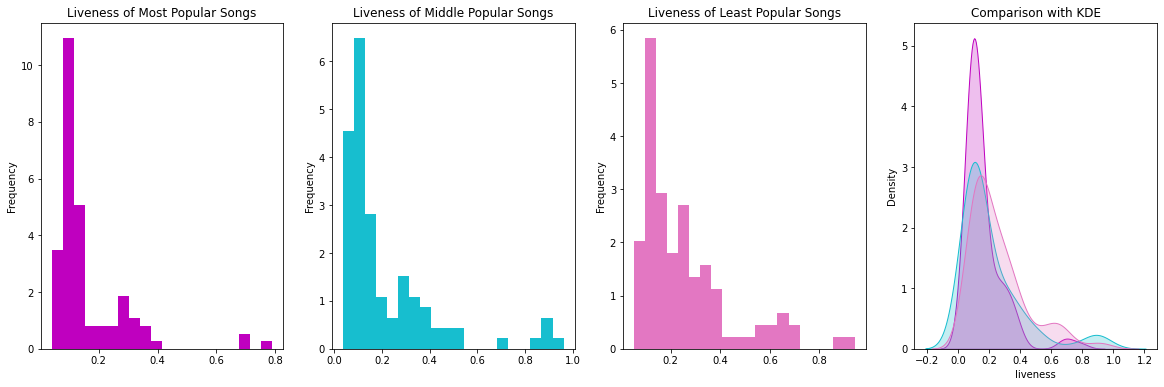

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,6))

popular_song['liveness'].plot(kind="hist", ax=ax[0], bins = 20, label = "liveness", color = "m", density=True)
ax[0].set_title("Liveness of Most Popular Songs")

middle_song['liveness'].plot(kind="hist", ax=ax[1], bins = 20, label = "liveness", color = "C9", density=True)
ax[1].set_title("Liveness of Middle Popular Songs")

least_song['liveness'].plot(kind="hist", ax=ax[2], bins = 20, label = "liveness", color = "C6", density=True)
ax[2].set_title("Liveness of Least Popular Songs")

sns.kdeplot(popular_song['liveness'], shade=True, label="liveness", ax=ax[3], color="m")
sns.kdeplot(middle_song['liveness'], shade=True, label="liveness", ax=ax[3], color="C9")
sns.kdeplot(least_song['liveness'], shade=True, label="liveness", ax=ax[3], color="C6")
ax[3].set_title("Comparison with KDE")


From the figure above, we can see that there is a little difference between songs which have different popularity level. However, if we try to explain more detail the difference of songs, we can conclude that songs which are least popular have higher liveness level compared to the songs which have most and middle popular.

p-value of the liveness for songs who have different popularity level: 0.0009062934518433481

**Interpreting Results of Liveness:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of liveness of songs which have different popularity level samples are not the same. Here, we reject the null hypothesis.

#### <font color='#6600cc'>What is the effect of the acousticness to the popularity of the songs?

**Hypothesis Test:** We want to test whether there is significant differences in terms of acousticness for songs which have different popularity level.



**Null Hypothesis *(H0)*:** Means of acousticness for all songs which have different popularity level are same.

$ H_0: \mu_{a Most Popular Songs} = \mu_{a Middle Popular Songs} = \mu_{a Least Popular Songs}$



**Alternative Hypothesis *(HA)*:** Means of acousticness for all songs which have different popularity level are not the same.

$ H_A:$ Means $\mu_{a Most Popular Songs}, \mu_{a Middle Popular Songs}, \mu_{a LeastPopular Songs}$ are different.

We use the ANOVA test statistic to determine the **p-value** of the acousticness of songs of different popularity level because we try to measure three samples simultaneously.

**Significance Level:** As most of hypothesis tests assume significance level as 0.05, we are setting it as 0.05 for our test too.

The mean of acousticness of most popular 100 songs is: 0.26586389999999993

The mean of acousticness of middle popular 100 songs is: 0.4185692099999999

The mean of acousticness of least popular 100 songs is: 0.8838492000000001

Text(0.5, 1.0, 'Comparison with KDE')

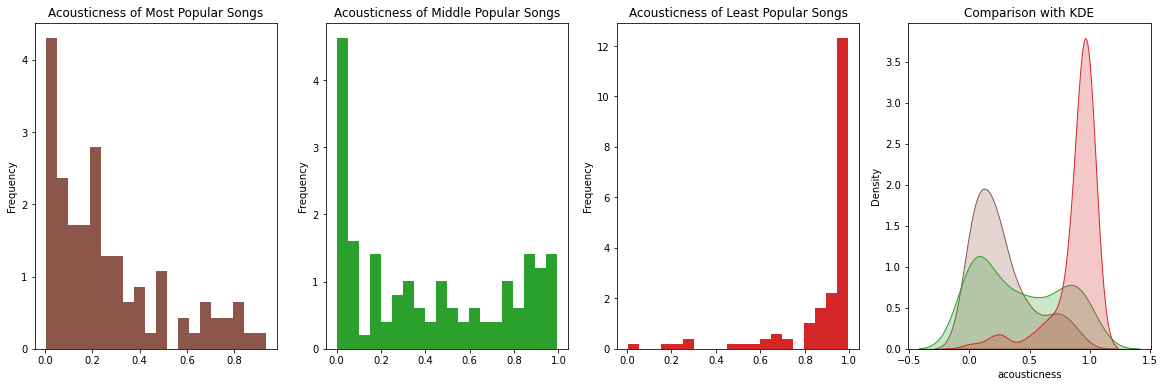

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,6))

popular_song['acousticness'].plot(kind="hist", ax=ax[0], bins = 20, label = "acousticness", color = "C5", density=True)
ax[0].set_title("Acousticness of Most Popular Songs")

middle_song['acousticness'].plot(kind="hist", ax=ax[1], bins = 20, label = "acousticness", color = "C2", density=True)
ax[1].set_title("Acousticness of Middle Popular Songs")

least_song['acousticness'].plot(kind="hist", ax=ax[2], bins = 20, label = "acousticness", color = "C3", density=True)
ax[2].set_title("Acousticness of Least Popular Songs")

sns.kdeplot(popular_song['acousticness'], shade=True, label="instrumentalness", ax=ax[3], color="C5")
sns.kdeplot(middle_song['acousticness'], shade=True, label="instrumentalness", ax=ax[3], color="C2")
sns.kdeplot(least_song['acousticness'], shade=True, label="instrumentalness", ax=ax[3], color="C3")
ax[3].set_title("Comparison with KDE")

From the figure above, we can see that the songs which are least popular have high acousticness level compared to the songs which are popular and middle popular. 

p-value of the acousticness for songs who have different popularity level: 1.3278406668183206e-43

**Interpreting Results of Acousticness:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of acousticness of songs which have different popularity level samples are not the same. Here, we reject the null hypothesis.

###<font color="yellow">Machine Learning

####Linear Regression

We used the Linear Regression Model for the examining popularity of the songs. We thought that some features such as acousticness, danceability, duration_ms, energy, explicit, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, valence, year. 
 We found that acousticnes, danceability and liveness have effect on the popularity of the songs at the hypothesis testing part.
Therefore, we also tried to understand the prediction of popularity of the songs looking at the whole features.

In [ ]:
from google.colab import files
from IPython import display

uploaded = files.upload()


Saving linearregression.png to linearregression.png


In [ ]:
#evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.3754131272592298

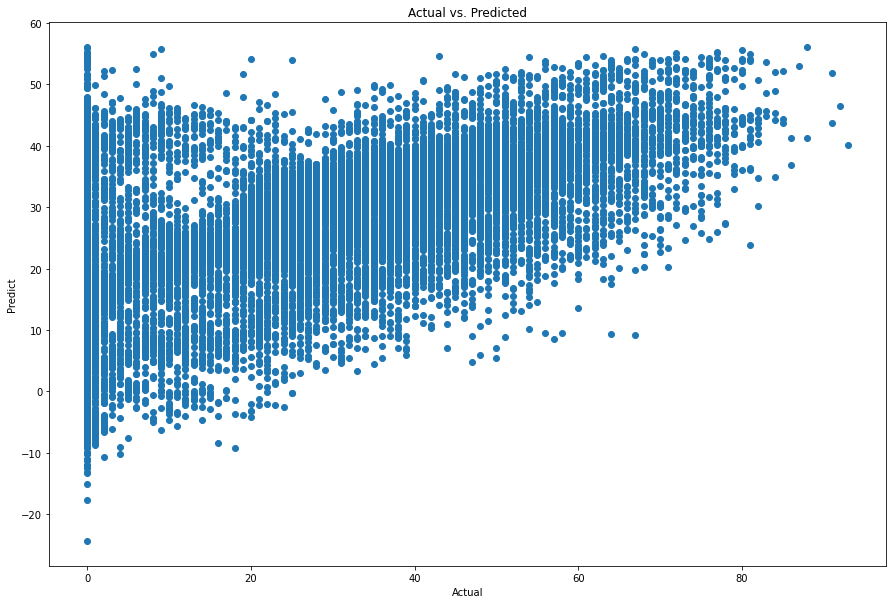

In [ ]:
display.Image("linearregression.png", width=500)

In [ ]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted value": y_predict, "Difference": y_test-y_predict})
pred_y_df.head(3000)

,Actual Value,Predicted value,Difference
38352,43,19.225009,23.774991
53261,38,31.274989,6.725011
84960,72,49.973733,22.026267
106365,65,50.677247,14.322753
14461,8,19.759875,-11.759875
...,...,...,...
36074,26,35.878850,-9.878850
101220,56,44.811739,11.188261
52229,29,36.400838,-7.400838
81774,30,47.808072,-17.808072


Firstly, we dropped the some features which are not numerical values.

We splitted out data as test, train and validation to check whether it has over-fitting and under-fitting.


We measured the errors and we used metrics to be as minimum as possible for a good performing model.


Then, we calculated the coefficient $R^2$ as using $R^2$ function which takes y_pred and y_true to evaluate our models score.


In conclusion, we found that the score of the regression model is 0.37.

####Random Forest

Best Parameters: {'max_depth': 9, 'n_estimators': 9}

After tuning Training w/bin set score: 0.6488

After tuning Test w/bin set score: 0.6238

Predicted labels: 
 [41.47454742 38.71893607  0.7690986  ... 36.00978727  1.33468653
 49.22845574]

MSE (mean squared error):  180.42570222066206


MAE (mean absolute error): 9.026547775221577


RMSE (root mean squared error):  13.432263480912741

####Decision Tree

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2}


AFTER tuning Training w/bin set score: 0.5576


AFTER tuning Test w/bin set score: 0.4908


Predicted labels are: [44.05676504 37.43485994 34.55453906 ... 37.44644751  0.93210907
 50.03797468]


MSE (mean squared error):  211.9650606044683


MAE (mean absolute error): 10.294587431025104


RMSE (root mean squared error):  14.559019905353118

####K-Nearest Neighbors Model

Best Parameters: {'n_neighbors': 17}

AFTER tuning Training w/bin set score: 0.5672


AFTER tuning Test w/bin set score: 0.5134

Predicted labels: 
 [36.05882353 39.52941176 11.35294118 ... 37.35294118  3.64705882
 36.29411765]


MSE (mean squared error):  233.38630720905357


MAE (mean absolute error): 11.083816530224682


RMSE (root mean squared error):  15.276986195223637

### The Conlusion of the Machine Learning Model

As a result of testing these Machine Learning Models and tuning them, we found that Random Forest Model, which has 0.65 training accuracy and 0.62 testing accuracy, is best way to predict the popularity of the songs.

Best parameters to use in Random Forest Model are "max_depth": 9, "n_estimators": 9.

##<font color="orange">How Songs of Different Genres Change Over Time?

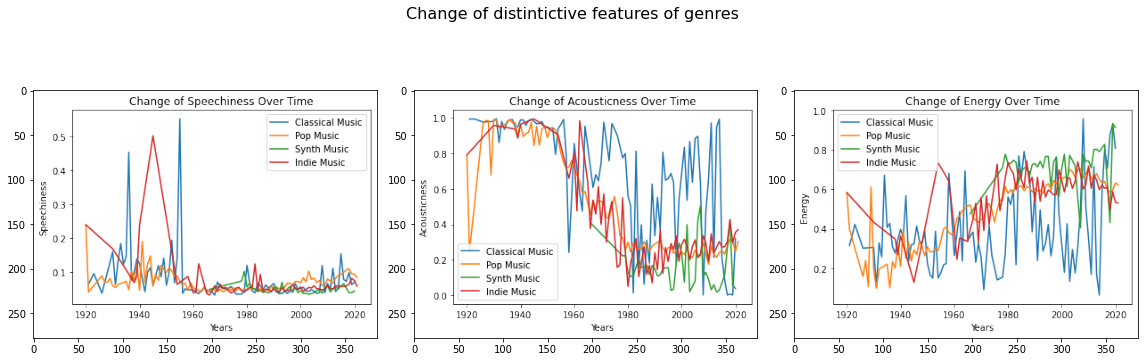

In [ ]:
import matplotlib.pyplot as plt
img1 = plt.imread('./drive/MyDrive/genrespeech.png')
img2 = plt.imread('./drive/MyDrive/genreacoustic.png')
img3 = plt.imread('./drive/MyDrive/genreenergy.png')


NUM_ROWS = 1
IMGs_IN_ROW = 3

f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)



title = 'Change of distintictive features of genres'
f.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()

We examined the change of loudness, instrumentalness, danceability, acousticness, liveness, speechiness and energy of pop, classical, indie and synth songs over time. However, we decided to go with change of acousticness, speechiness, and energy of pop songs over time. According to the data, acousticness had a sudden drop from 1945s to 1980s, speechiness had a little decrease during 1950s. On the other hand, energy of pop songs had increased continuously from 1930s to 2010s.

###Hypothesis Testing


#### <font color='#92A8D1'>How did technological advancements affect accousticness of 50s and 60s pop songs?

Sample Groups: 
- 50s' Pop Songs
- 60s' Pop Songs

$\large{μ_1}$: Acousticness Mean of 50s Pop Songs 

$\large{μ_2}$: Acousticness Mean of 60s Pop Songs


Null Hypothesis ($\large{H_0}$): Acousticness of pop songs did not change 50s to 60s. ($\large{μ_1}$ = $\large{μ_2}$)


Alternative Hypothesis ($\large{H_A}$): Acousticness of pop songs increased between 50s to 60s. ($\large{μ_1}$ >
 $\large{μ_2}$)

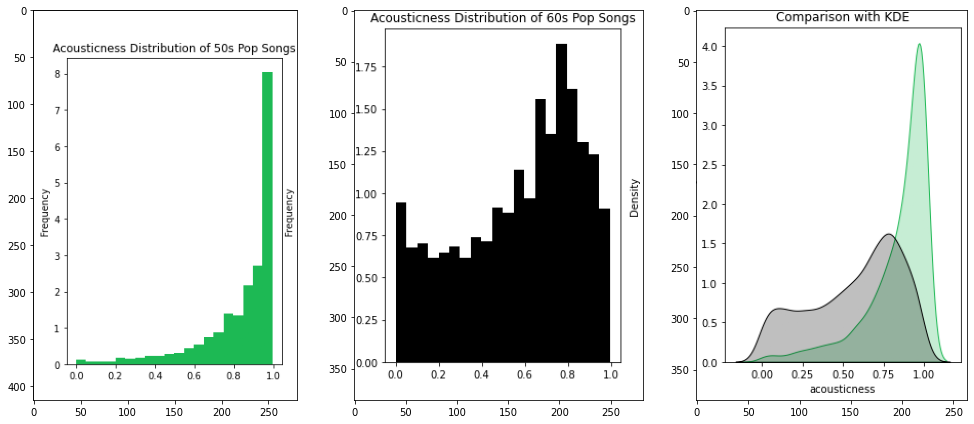

In [ ]:
import matplotlib.pyplot as plt
img1 = plt.imread('./drive/MyDrive/achp1.png')
img2 = plt.imread('./drive/MyDrive/achp2.png')
img3 = plt.imread('./drive/MyDrive/achp3.png')


NUM_ROWS = 1
IMGs_IN_ROW = 3

f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(14,6))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)



plt.tight_layout()
plt.show()

From the figure and means above, we can clearly see that 50s Pop songs have a higher Acousticness on avarage compared to 60s Pop songs.

Acousticness Mean of 50s Pop Songs: 0.8356064381720443
Acousticness Mean of 60s Pop Songs: 0.5705102398742824

Acousticness Standard Deviation of 50s Pop Songs: 0.19880118900765054
Acousticness Standard Deviation of 60s Pop Songs: 0.2791050802524513

T-Test Results: statistic=38.32314783681449, pvalue=2.9447454801970155e-272

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, since the test score is positive, acousticness mean of 50s pop songs is higher than 60s'.

#### <font color='#92A8D1'>How did technological advancements affect speechiness of 50s and 60s pop songs?

Sample Groups: 
- 50s' Pop Songs
- 60s' Pop Songs

$\large{μ_1}$: Speechiness Mean of 50s Pop Songs 

$\large{μ_2}$: Speechiness Mean of 60s Pop Songs


Null Hypothesis ($\large{H_0}$): Speechiness of pop songs did not change 50s to 60s. ($\large{μ_1}$ = $\large{μ_2}$)


Alternative Hypothesis ($\large{H_A}$): Speechiness of pop songs increased between 50s to 60s. ($\large{μ_1}$ >
 $\large{μ_2}$)

Instrumentalness Mean of 50s Pop Songs: 0.16861625849462383
Instrumentalness Mean of 60s Pop Songs: 0.07825291128177106

Instrumentalness Standard Deviation of 50s Pop Songs: 0.3094546316258834
Instrumentalness Standard Deviation of 60s Pop Songs: 0.22531848622709347

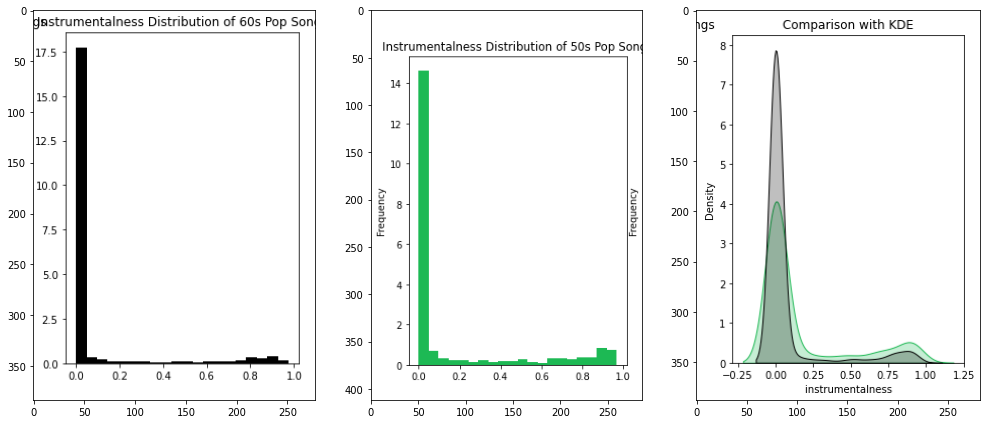

In [ ]:
import matplotlib.pyplot as plt
img1 = plt.imread('./drive/MyDrive/ishp1.png')
img2 = plt.imread('./drive/MyDrive/ishp2.png')
img3 = plt.imread('./drive/MyDrive/ishp3.png')


NUM_ROWS = 1
IMGs_IN_ROW = 3

f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(14,6))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)



plt.tight_layout()
plt.show()

From the figure and means above, we can see that 50s Pop songs have a higher instrumentalness on avarage compared to 60s Pop songs.

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, since the test score is positive, instrumentalness mean of 50s pop songs is higher than 60s'.

T-Test Results: statistic=10.216501458200424, pvalue=5.8216872713060226e-24

In conclusion, acousticness and instrumentalness of pop songs had decreased while energy had increased 50s to 60s. This change might be the effect of the synthesizers which had started to be used in the 50s as a result of advencing technology. Growing interest in electronic music could cause to a drecrease in acousticness and instrumentalness, but an increase in energy of pop songs.

#### <font color='#92A8D1'>How did technological advancements affect energy of 50s and 60s pop songs?

Sample Groups: 
- 50s' Pop Songs
- 60s' Pop Songs

$\large{μ_1}$: Energy Mean of 50s Pop Songs 

$\large{μ_2}$: Energy Mean of 60s Pop Songs

Null Hypothesis ($\large{H_0}$): Energy of pop songs did not change between 50s to 60s. ($\large{μ_1}$ = $\large{μ_2}$)


Alternative Hypothesis ($\large{H_A}$): Energy of pop songs decreased between 50s to 60s. ($\large{μ_1}$ >
 $\large{μ_2}$)

Energy Mean of 50s Pop Songs: 0.3352053561827962
Energy Mean of 60s Pop Songs: 0.46942724788193374

Energy Standard Deviation of 50s Pop Songs: 0.19755881845627493
Energy Standard Deviation of 60s Pop Songs: 0.20742066064625025

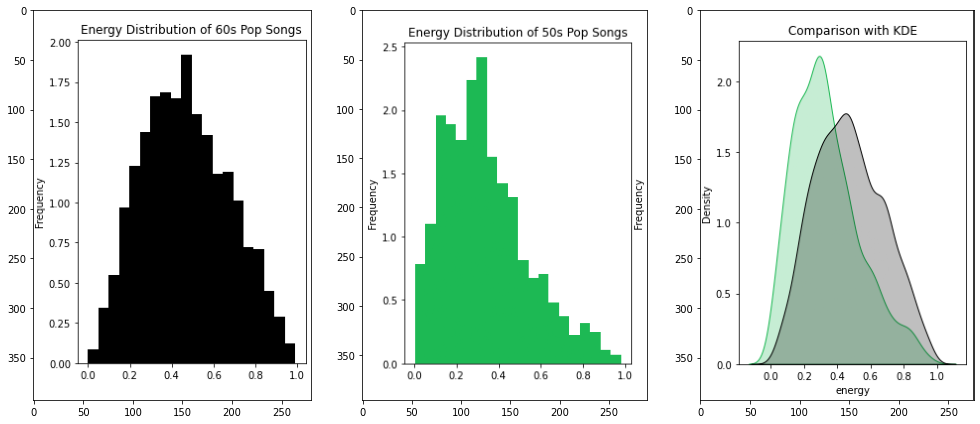

In [ ]:
import matplotlib.pyplot as plt
img1 = plt.imread('./drive/MyDrive/edhp1.png')
img2 = plt.imread('./drive/MyDrive/edhp2.png')
img3 = plt.imread('./drive/MyDrive/edhp3.png')


NUM_ROWS = 1
IMGs_IN_ROW = 3

f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(14,6))

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)



plt.tight_layout()
plt.show()

From the figure and means above, we can clearly see that 60s Pop songs have a higher Energy on avarage compared to 50s Pop songs.

T-Test Results: statistic=-21.777186546275203, pvalue=1.8042232321115885e-97

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, since the test score is negative, energy mean of 50s pop songs is smaller than 60s'.

##Song Recommendation System

In [ ]:
def euclidean_distance(row1, row2): # finds the euclidean distance between two points
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
  return math.sqrt(distance)

In [ ]:
def get_neighbors(train, test_row, num_neighbors): # finds the nearest neighbors to the given point in the data frame
	distances = list()
	for i in range(len(train)):
		dist = euclidean_distance(test_row, train.iloc[i])
		distances.append((train.iloc[i], dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [ ]:
x = input("Please enter the row numbers seperated by a comma (','): " ) # take the index of the wanted songs in the data frame

s = x.split(",")
songs = []

for ss in s:
  songs.append(ss.strip())
# wanted songs appended to the songs list seperately
wantedSongs = [] # a list to save all songs that are in the data frame for sure
                 # later we will suggest a song based on the mean of all features in this list

for song in songs:
  song = int(song)
  if len(tracksdf) > song: # if song is not out of bounds
    track = tracksdf.iloc[song] 
    songIndex = track.name # save the song index to the wanted songs
    wantedSongs.append(songIndex)
    tracksdf_genreFilter = tracksdf[tracksdf['genres'].apply(lambda x: tracksdf.iloc[songIndex]['genres'] in x)] # filter out the songs that are not in the same genre as the wanted song

    if len(tracksdf_genreFilter) > 1: # if there is other songs in the same genre
      newTracksdf = tracksdf_genreFilter.drop(columns=['artists', 'id', 'name', 'genres', 'release_date']) # drop the categorical columns from both data frames
      newTracksdf_song = tracksdf.drop(columns=['artists', 'id', 'name', 'genres', 'release_date'])
      neighbors = get_neighbors(newTracksdf, newTracksdf_song.iloc[songIndex], 2) # find the closest 2 neighbors of the wanted songs, the firs one is the songs itself the second song
                                                                                  # is the first closest song to the wanted song
      print("Recommended song based on '" + track['artists'] + " - " + track['name'] + "' is '" + tracksdf.iloc[neighbors[1].name]['artists'] + " - " + tracksdf.iloc[neighbors[1].name]['name'] + "'.")
        # print out the which song is reccommended according to which song
    else: # if there is no any other songs in the same genre
      print("There is not another song in the same genre, recommendation will not take genre account.")
      newTracksdf = tracksdf_genreFilter.drop(columns=['artists', 'id', 'name', 'genres', 'release_date']) # drop the categorical columns from both data frames
      newTracksdf_song = tracksdf.drop(columns=['artists', 'id', 'name', 'genres', 'release_date'])
      neighbors = get_neighbors(newTracksdf, newTracksdf_song.iloc[songIndex], 2) # find the closest 2 neighbors of the wanted songs, the firs one is the songs itself the second song
                                                                                  # is the first closest song to the wanted song      
      print("Recommended song based on '" + track['artists'] + " - " + track['name'] + "' is '" + tracksdf.iloc[neighbors[1].name]['artists'] + " - " + tracksdf.iloc[neighbors[1].name]['name'] + "'.")
        # print out the which song is reccommended according to which song
  else: # ifsong is out of bounds
    print("There is not such song in the data frame.")

featureSums = { # a library which saves the sum of all features in wanted songs list
    'acousticness': 0.0,
    'danceability': 0.0,
    'duration_ms': 0.0,
    'energy': 0.0,
    'instrumentalness': 0.0,
    'liveness': 0.0,
    'loudness': 0.0,
    'popularity': 0.0,
    'speechiness': 0.0,
    'tempo': 0.0,
    'valence': 0.0,
    'year': 0.
}

newTracksdf = tracksdf.drop(columns=['artists', 'id', 'name', 'genres', 'release_date', 'key']) # drop the categorical columns from the data frame

explicitCount = 0
modeCount = 0

for wantedSong in wantedSongs: # for every song in wanted songs
                               # sum its feature with the same feature in the featureSums library
  featureSums['acousticness'] += newTracksdf.iloc[wantedSong]['acousticness']
  featureSums['danceability'] += newTracksdf.iloc[wantedSong]['danceability']
  featureSums['duration_ms'] += newTracksdf.iloc[wantedSong]['duration_ms']
  featureSums['energy'] += newTracksdf.iloc[wantedSong]['energy']
  featureSums['instrumentalness'] += newTracksdf.iloc[wantedSong]['instrumentalness']
  featureSums['liveness'] += newTracksdf.iloc[wantedSong]['liveness']
  featureSums['loudness'] += newTracksdf.iloc[wantedSong]['loudness']
  featureSums['popularity'] += newTracksdf.iloc[wantedSong]['popularity']
  featureSums['speechiness'] += newTracksdf.iloc[wantedSong]['speechiness']
  featureSums['tempo'] += newTracksdf.iloc[wantedSong]['tempo']
  featureSums['valence'] += newTracksdf.iloc[wantedSong]['valence']
  featureSums['year'] += newTracksdf.iloc[wantedSong]['year']
  explicitCount += newTracksdf.iloc[wantedSong]['explicit']
  modeCount += newTracksdf.iloc[wantedSong]['mode']

newRow = { # a library which will save the mean of every feature as a row
    'acousticness': 0,
    'danceability': 0,
    'duration_ms': 0,
    'energy': 0,
    'explicit': 0,
    'instrumentalness': 0,
    'liveness': 0,
    'loudness': 0,
    'mode': 0,
    'popularity': 0,
    'speechiness': 0,
    'tempo': 0,
    'valence': 0,
    'year': 0
}

if (explicitCount/len(wantedSongs)) > 1/2: # if explicit content occurence is more than half,
  newRow['explicit'] = 1; # newRow will also be explicit

if (modeCount/len(wantedSongs)) > 1/2: # if mode occurence is more than half,
  newRow['mode'] = 1 # newRow's mode will be 1

# save all means to the newRow
newRow['acousticness'] = featureSums['acousticness']/len(wantedSongs)
newRow['danceability'] = featureSums['danceability']/len(wantedSongs)
newRow['duration_ms'] = featureSums['duration_ms']/len(wantedSongs)
newRow['energy'] = featureSums['energy']/len(wantedSongs)
newRow['instrumentalness'] = featureSums['instrumentalness']/len(wantedSongs)
newRow['liveness'] = featureSums['liveness']/len(wantedSongs)
newRow['loudness'] = featureSums['loudness']/len(wantedSongs)
newRow['popularity'] = featureSums['popularity']/len(wantedSongs)
newRow['speechiness'] = featureSums['speechiness']/len(wantedSongs)
newRow['tempo'] = featureSums['tempo']/len(wantedSongs)
newRow['valence'] = featureSums['valence']/len(wantedSongs)
newRow['year'] = featureSums['year']/len(wantedSongs)

newRowData = {
    'acousticness': [newRow['acousticness']],
    'danceability': [newRow['danceability']],
    'duration_ms': [newRow['duration_ms']],
    'energy': [newRow['energy']],
    'explicit': [newRow['explicit']],
    'instrumentalness': [newRow['instrumentalness']],
    'liveness': [newRow['liveness']],
    'loudness': [newRow['loudness']],
    'mode': [newRow['mode']],
    'popularity': [newRow['popularity']],
    'speechiness': [newRow['speechiness']],
    'tempo': [newRow['tempo']],
    'valence': [newRow['valence']],
    'year': [newRow['year']]
}
# turn newRaw into a data frame
songdf = pd.DataFrame(newRowData)

neighbors = get_neighbors(newTracksdf, songdf.iloc[0], 2) # get the closest neighbor to the mean of all songs
print("Recommended song based on the mean of all songs is '" + tracksdf.iloc[neighbors[1].name]['artists'] + " - " + tracksdf.iloc[neighbors[1].name]['name'] + "'.")
# print out the which song is reccommended according to mean

Please enter the row numbers seperated by a comma (','): 60449, 60349, 60249, 50349
Recommended song based on 'Billie Eilish - Six Feet Under' is 'Ellise - 911'.
Recommended song based on '6LACK - Luving U' is '6LACK - PRBLMS'.
Recommended song based on 'Post Malone - Circles' is 'Post Malone - Takin' Shots'.
Recommended song based on 'Hanson - Little Saint Nick' is 'Hanson - What Christmas Means To Me'.
Recommended song based on the mean of all songs is 'Selena Gomez - Kill Em With Kindness'.
